In [1]:
import os
import numpy as np
import re
import statistics

In [2]:
#address = r"C:\Users\PD-PC\Desktop\Projects\Log-Visualizer\Players_Data"

In [3]:
#f_names = os.listdir(address)

In [4]:
#len(f_names)

In [5]:
#embed_names = os.listdir(address+'/Embeddings')

In [6]:
#embed_names

In [7]:
def check_ext(f_names):
    filtered_names = []
    for name in f_names:
        if(len(name)>4):
            if(name[-4:] == ".npy"):
                filtered_names.append(name)
    return filtered_names

In [8]:
#f_names = check_ext(f_names)
#print(len(f_names))

In [9]:
avg_life = {}
avg_var = {}
life_data = {}


In [10]:
def add_life_exp(life, tob, life_data):
    #Function to add values to mean and variance
    '''
        Inputs :-
            life        :- The life time of the player
            tob         :- Time of birth of the player
            life_data   :- Dictionary containing the values {tob : life} for players
    '''

    if tob not in life_data.keys():
        life_data[tob] = [life]
    else:
        life_data[tob].append(life)
    return life_data

In [11]:
def get_life_stats(address):
    #Return various stats based on lifetime of players
    '''
        Inputs:
            address  :-  Address of the folder containing the log Files
        Returns:
            mean     :- Dictionary containting the mean of lifetimes of players born at a particular time. {time_of_birth: mean}
            variance :- Dictionary containting the variance of lifetimes of players born at a particular time. {time_of_birth: variance}
            qof      :- Dictionary containing the Quality of life index of players born at a particulartime . {time: count_qof}
    '''
    f_names = os.listdir(address)
    f_names = check_ext(f_names)
    life_data = {}
    for f_name in f_names:
        vals = np.load(address+'/'+f_name, allow_pickle = True)
        tob, id = f_name.split('-')
        tod = vals[-1][1]
        life = tod-int(tob)
        life_data = add_life_exp(life, tob, life_data)
    variance = {}
    mean = {}
    qof = {}
    for i in life_data.keys():
        if len(life_data[i]) == 1:
            variance[i] = 0
            mean[i] = life_data[i][0]
            qof[i] = 1 if life_data[i][0] >= 30 else 0
            continue
        qof[i] = sum(np.array(life_data[i])>30)
        variance[i] = statistics.stdev(life_data[i])
        mean[i] = statistics.mean(life_data[i])
    return mean, variance, qof



In [21]:
mean, variance, qof = get_life_stats(r"Players_Data_ini_pop/Players_Data_ini_pop_5")

In [30]:
mean = {int(k):v for k, v in mean.items()}
variance = {int(k):v for k, v in variance.items()}
qof = {int(k):v for k, v in qof.items()}

In [31]:
from collections import OrderedDict

mean_sorted = OrderedDict(sorted(mean.items()))
variance_sorted = OrderedDict(sorted(variance.items()))
qof_sorted = OrderedDict(sorted(qof.items()))

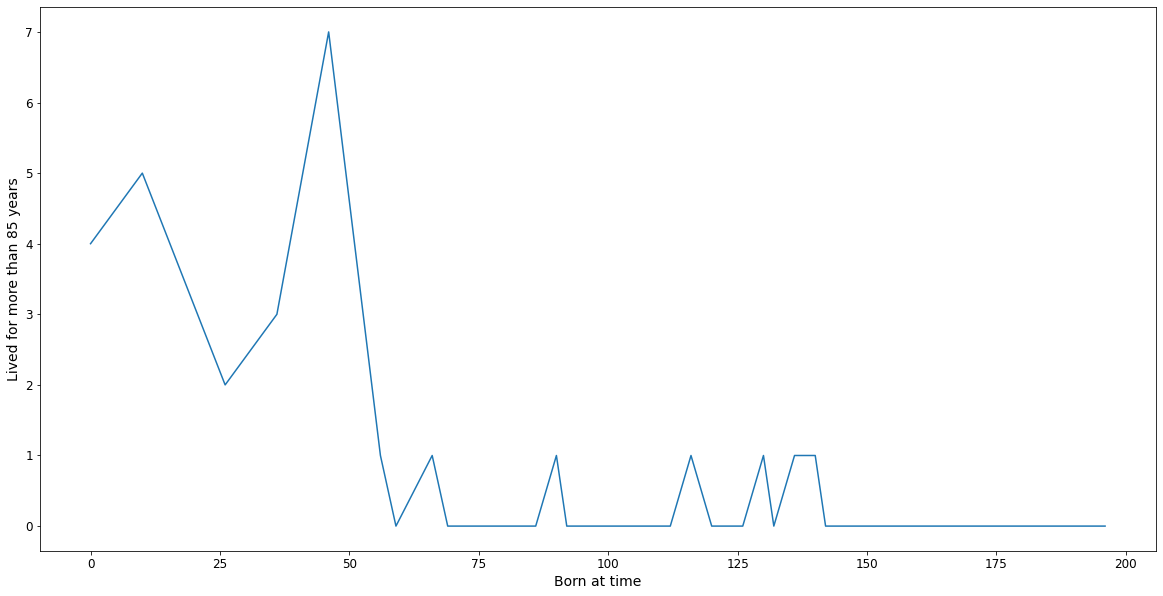

In [42]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(list(qof_sorted.keys()), list(qof_sorted.values()))
plt.ylabel('Lived for more than 85 years', fontsize=14)
plt.xlabel('Born at time', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

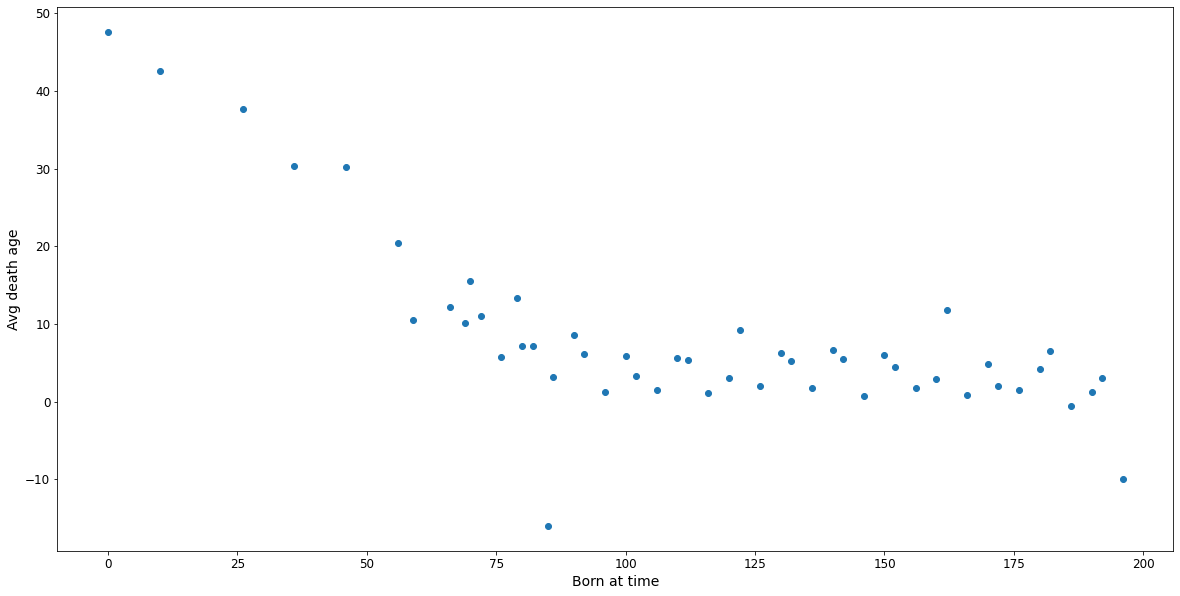

In [39]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.scatter(list(mean.keys()), list(mean.values()))
plt.ylabel('Avg death age', fontsize=14)
plt.xlabel('Born at time', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

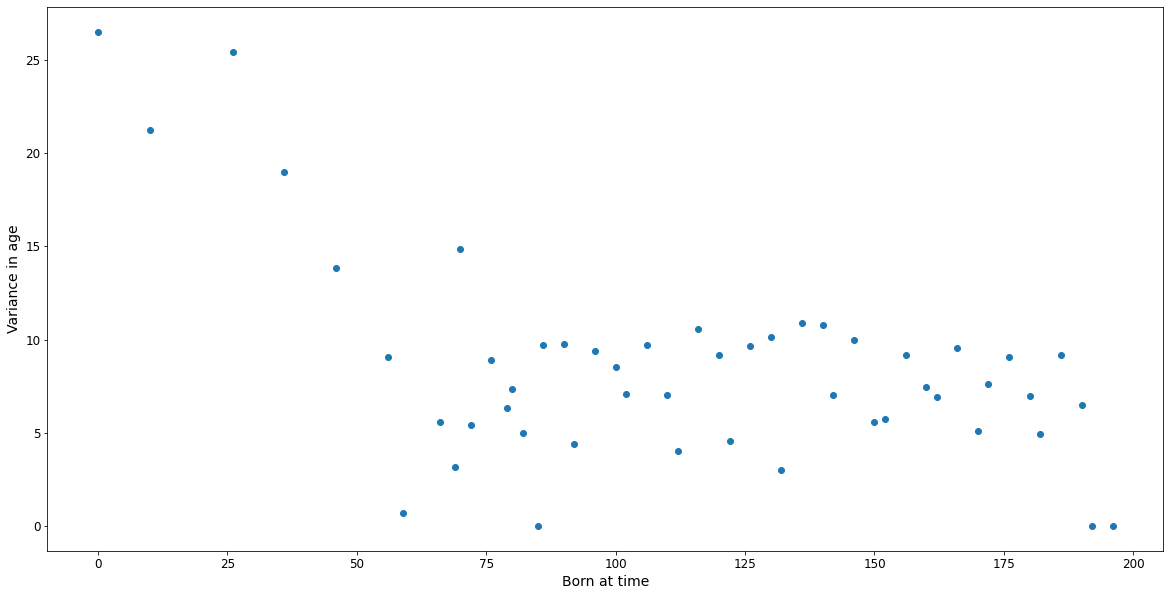

In [44]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.scatter(list(variance.keys()), list(variance.values()))
plt.ylabel('Variance in age', fontsize=14)
plt.xlabel('Born at time', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [16]:
def get_vals(f_name):
    values = np.load(address+'/'+f_name, allow_pickle = True)
    return values
    

In [17]:
'''for f_name in f_names:
    vals = get_vals(f_name)
    tob, id = f_name.split('-')
    tod = vals[-1][1]
    life = tod-int(tob)
    add_life_exp(life, tob)
  '''
    

NameError: name 'f_names' is not defined

In [ ]:
'''life_data'''

In [ ]:
'''def add_life_exp(life, tob):
    if tob not in life_data.keys():
        life_data[tob] = [life]
    else:
        life_data[tob].append(life)'''

In [ ]:
'''variance = {}
mean = {}
for i in life_data.keys():
    if len(life_data[i]) == 1:
        variance[i] = 0
        mean[i] = life_data[i][0]
        continue
    variance[i] = statistics.stdev(life_data[i])
    mean[i] = statistics.mean(life_data[i])
print(mean, variance)'''

In [ ]:
#print(get_vals(f_names[25]))

In [ ]:
'''print(np.load(address+'/Embeddings/'+embed_names[0]))'''

In [ ]:
def add_node(id, parent_id):
    #Function to add a node to the graph
    '''
        Inputs:
            id :- file name of the current node (to be added)
            parent_id :- file name (minus the extension) of the parent of id
    '''
    if parent_id != None:
        parent_id = parent_id+".npy"
    if id not in Fam_Tree:
        Fam_Tree[id] =[parent_id]
    elif parent_id != []:
        Fam_Tree[id].append(parent_id)

In [ ]:
Fam_Tree = {}
def add_node(id, parent_id):
    if parent_id != None:
        parent_id = parent_id+".npy"
    if id not in Fam_Tree:
        Fam_Tree[id] =[parent_id]
    elif parent_id != []:
        Fam_Tree[id].append(parent_id)

In [ ]:
f = True
for f_name in f_names:
    values = get_vals(f_name)
    i = values[1]
    i = np.array([[1,2],[3,4]])
    if i.shape ==  (2,):
        add_node(f_name, str(i[1])+'-'+str(i[0]))

    elif i.shape == (2,2):
        add_node(f_name, str(i[0][1])+'-'+str(i[0][0]))
        add_node(f_name, str(i[1][1])+'-'+str(i[1][0]))
    
    
    

In [ ]:
Fam_Tree